In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Projects\Final_Year_project\Twiiter_sentiment_analysis\Data_Cleaning\cleaned_sabrimalai_data.csv")
df.head()

Date                                               Text  Favourites  \
0  02/Nov/2019  will never stand and support this crook Always...         0.0   
1  02/Nov/2019  neo judiciary and neo ruler let down SADHU and...         0.0   
2  02/Nov/2019  Why there news about Karma Samithi young woman...         0.0   
3  02/Oct/2019        Please understand that there gender discrim         0.0   
4  02/Oct/2019  Why people comment issue which they have idea ...         0.0   

   Retweet             User  Sentiment Sentiment Class  
0      0.0       iVimalNair         -1        Negative  
1      0.0  Patriotofbharat          0         Neutral  
2      0.0  ShashiGangadhar          0         Neutral  
3      0.0        ur_vishnu          1        Positive  
4      0.0       Dileeplive          0         Neutral

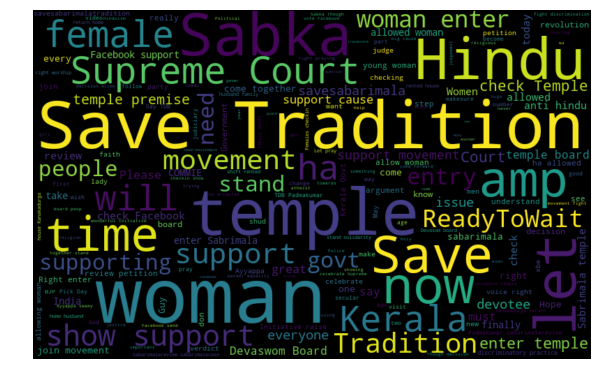

In [3]:
all_words = ' '.join([str(text) for text in df['Text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

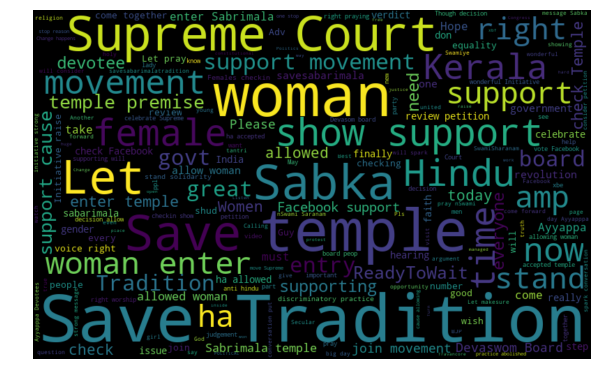

In [4]:
positive_words =' '.join([text for text in df['Text'][df['Sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

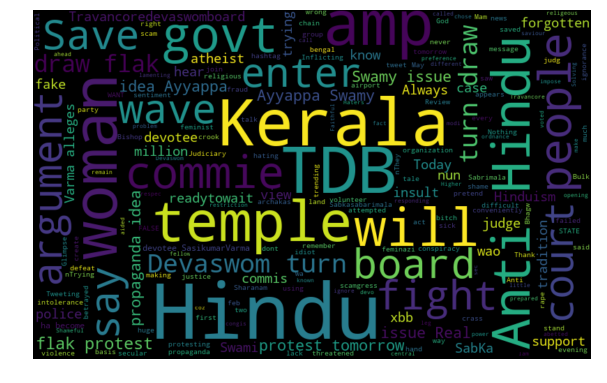

In [5]:
negative_words = ' '.join([text for text in df['Text'][df['Sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [10]:
# function to collect hashtags
def hashtag_extract(x):
    hasht = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall("(\w{4,})", str(i))
        hashtags.append(ht)

    return hashtags

In [11]:
# extracting hashtags from non racist/sexist tweets

HT_neutral = hashtag_extract(df['Text'][df['Sentiment'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(df['Text'][df['Sentiment'] == -1])

HT_positive = hashtag_extract(df['Sentiment'][df['Sentiment'] == 1])


# unnesting list
HT_regular = sum(HT_neutral,[])
HT_negative = sum(HT_negative,[])
HT_positive = sum(HT_positive,[])

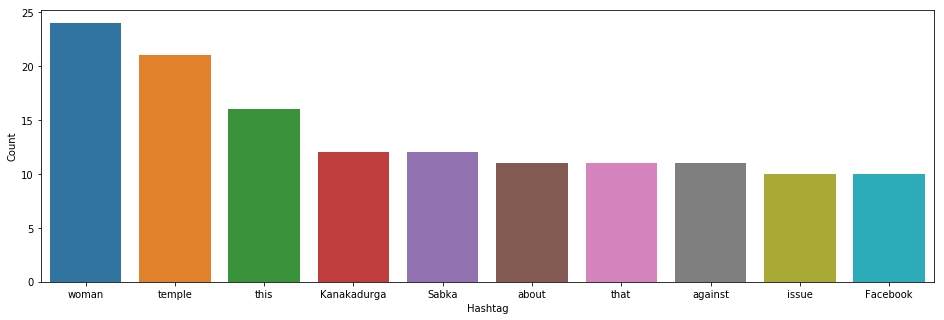

In [12]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

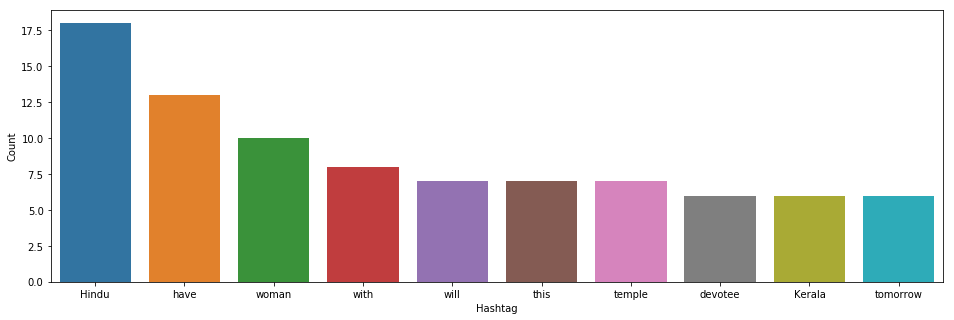

In [13]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()